<a href="https://colab.research.google.com/github/Josue-Aldebaran-G-L/Proyecto-AVD/blob/Schen/AVD_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importaciones

In [323]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy as sp

from tqdm import tqdm

In [126]:
path = "/content/drive/MyDrive/Datasets/games_march2025_full.csv"
dataset = pd.read_csv(path)

In [127]:
dataset.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')

In [128]:
norm_dataset = dataset.drop(
  [
    "appid",
    "name",
    "short_description",
    "header_image",
    "website",
    "support_url",
    "support_email",
    "metacritic_url",
    "developers",
    "screenshots",
    "movies",
    "user_score",
    "score_rank",
    "pct_pos_recent",
    "num_reviews_recent",
    "supported_languages",
    "full_audio_languages",
    "linux",
    "mac",
    "windows",
    "packages",
    "index"
  ],
  axis=1
)

In [129]:
norm_dataset.head(3)

,release_date,required_age,price,dlc_count,detailed_description,about_the_game,reviews,metacritic_score,achievements,recommendations,...,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total
0,2012-08-21,0,0.0,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,0,1,4401572,...,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939
1,2017-12-21,0,0.0,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",NaN,0,37,1732007,...,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842
2,2013-07-09,0,0.0,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...",“A modern multiplayer masterpiece.” 9.5/10 – D...,90,0,14337,...,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595


In [130]:
norm_dataset.tail(3)

,release_date,required_age,price,dlc_count,detailed_description,about_the_game,reviews,metacritic_score,achievements,recommendations,...,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total
94945,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,NaN,0,0,0,...,0 - 20000,0,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1
94946,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...",NaN,0,34,0,...,0 - 20000,0,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1
94947,2018-03-01,0,9.99,0,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a Boss Rush game that pi...,NaN,0,12,0,...,0 - 20000,0,0,0,0,0,0,"{'Action': 22, 'Indie': 21}",-1,-1


In [131]:
print(len(dataset.columns))
print(len(norm_dataset.columns))

47
26


In [132]:
norm_dataset.describe()

,required_age,price,dlc_count,metacritic_score,achievements,recommendations,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total
count,94948.000000,94948.000000,94948.000000,94948.000000,94948.000000,9.494800e+04,9.494800e+04,9.494800e+04,9.494800e+04,94948.000000,9.494800e+04,94948.000000,94948.000000,9.494800e+04,94948.000000,9.494800e+04
mean,0.178287,6.911444,0.563203,2.763966,19.543729,1.022212e+03,1.217905e+03,2.021265e+02,1.086097e+02,4.757320,1.083665e+02,5.017926,4.307094,9.285272e+01,44.630261,1.448044e+03
std,1.701329,13.071148,14.915685,14.111183,159.798834,2.274151e+04,3.097974e+04,5.955813e+03,6.620827e+03,175.961001,8.555995e+03,184.244795,16.111535,5.554794e+03,40.837047,3.548141e+04
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00
25%,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00
50%,0.000000,3.990000,0.000000,0.000000,2.000000,0.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,58.000000,1.500000e+01
75%,0.000000,9.990000,0.000000,0.000000,19.000000,0.000000e+00,5.100000e+01,1.500000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,84.000000,8.000000e+01
max,21.000000,999.980000,3427.000000,97.000000,9821.000000,4.401572e+06,7.480813e+06,1.135108e+06,1.462997e+06,18568.000000,1.462997e+06,18568.000000,100.000000,1.212356e+06,100.000000,8.632939e+06


#Limpieza de Datos

In [133]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              94948 non-null  object 
 1   required_age              94948 non-null  int64  
 2   price                     94948 non-null  float64
 3   dlc_count                 94948 non-null  int64  
 4   detailed_description      89522 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   10428 non-null  object 
 7   metacritic_score          94948 non-null  int64  
 8   achievements              94948 non-null  int64  
 9   recommendations           94948 non-null  int64  
 10  notes                     16652 non-null  object 
 11  publishers                94948 non-null  object 
 12  categories                94948 non-null  object 
 13  genres                    94948 non-null  object 
 14  positi

##"about_the_game" & "detailed_description"

In [134]:
not_na_indexes = norm_dataset["about_the_game"].dropna().index.intersection(norm_dataset["detailed_description"].dropna().index)
len(not_na_indexes)

89499

In [135]:
norm_dataset = norm_dataset.loc[not_na_indexes]
norm_dataset.index = range(len(norm_dataset))

In [136]:
norm_dataset.tail(3)

,release_date,required_age,price,dlc_count,detailed_description,about_the_game,reviews,metacritic_score,achievements,recommendations,...,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total
89496,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,NaN,0,0,0,...,0 - 20000,0,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1
89497,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...",NaN,0,34,0,...,0 - 20000,0,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1
89498,2018-03-01,0,9.99,0,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a Boss Rush game that pi...,NaN,0,12,0,...,0 - 20000,0,0,0,0,0,0,"{'Action': 22, 'Indie': 21}",-1,-1


In [137]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89499 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89499 non-null  object 
 1   required_age              89499 non-null  int64  
 2   price                     89499 non-null  float64
 3   dlc_count                 89499 non-null  int64  
 4   detailed_description      89499 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   10410 non-null  object 
 7   metacritic_score          89499 non-null  int64  
 8   achievements              89499 non-null  int64  
 9   recommendations           89499 non-null  int64  
 10  notes                     16614 non-null  object 
 11  publishers                89499 non-null  object 
 12  categories                89499 non-null  object 
 13  genres                    89499 non-null  object 
 14  positi

##"reviews"

In [138]:
norm_dataset["reviews"].head(3)

,reviews
0,NaN
1,NaN
2,“A modern multiplayer masterpiece.” 9.5/10 – D...


In [139]:
for i, text in enumerate(norm_dataset[norm_dataset["reviews"].notna()]["reviews"]):
  if(i == 10):
    break
  print(i, text)

0 “A modern multiplayer masterpiece.” 9.5/10 – Destructoid “Once you start to learn its secrets, there’s a wild and exciting variety of play here that’s unmatched, even by its peers.” 9.4/10 – IGN “Dota 2 is possibly the only competitive free-to-play game that is totally uncompromised by its business model.” 90/100 – PC Gamer 
1 “Rust is one of the cruelest games on Steam, and that's what makes it so compelling.” PC Gamer “Usually, people will just kill you on sight, but not always.” Rock Paper Shotgun “For competitive players who want a mix of survival and crafting, Rust is the best there is” IGN 
2 “It brings back the silly glee of unbridled experimentation, intuitive learning and playful social interactions that most of us haven't experienced since childhood. For that, it's essential.” 88 – PC Gamer 
3 “The champion of Battle Royales.” 9/10 – GameSpot “The best Battle Royale game.” 5/5 – GamesRadar+ “Free, friendly, and consistently fun. It's the best Battle Royale game available to

In [140]:
norm_dataset["reviews"] = norm_dataset["reviews"].fillna("")

In [141]:
norm_dataset["reviews"].isna().unique()

array([False])

##"notes"

In [142]:
norm_dataset["notes"]

,notes
0,Includes intense violence and blood.
1,NaN
2,"Dota 2 includes fantasy violence, use of alcoh..."
3,NaN
4,NaN
...,...
89494,NaN
89495,NaN
89496,NaN
89497,NaN


In [143]:
norm_dataset["notes"] = norm_dataset["notes"].fillna("")

In [144]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89499 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89499 non-null  object 
 1   required_age              89499 non-null  int64  
 2   price                     89499 non-null  float64
 3   dlc_count                 89499 non-null  int64  
 4   detailed_description      89499 non-null  object 
 5   about_the_game            89499 non-null  object 
 6   reviews                   89499 non-null  object 
 7   metacritic_score          89499 non-null  int64  
 8   achievements              89499 non-null  int64  
 9   recommendations           89499 non-null  int64  
 10  notes                     89499 non-null  object 
 11  publishers                89499 non-null  object 
 12  categories                89499 non-null  object 
 13  genres                    89499 non-null  object 
 14  positi

##Resultados

In [145]:
norm_dataset

,release_date,required_age,price,dlc_count,detailed_description,about_the_game,reviews,metacritic_score,achievements,recommendations,...,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total
0,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",,0,1,4401572,...,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939
1,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",,0,37,1732007,...,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842
2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...",“A modern multiplayer masterpiece.” 9.5/10 – D...,90,0,14337,...,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595
3,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",,96,77,1803063,...,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832
4,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,,0,0,1160724,...,0 - 20000,0,0,0,0,0,0,"{'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...",84,1168404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89494,2024-02-29,0,3.99,0,The name of the game is literally the game. Ou...,The name of the game is literally the game. Ou...,,0,6,0,...,0 - 20000,0,0,0,0,0,0,"{'2D Platformer': 91, 'Runner': 85, 'Platforme...",-1,-1
89495,2020-01-07,0,10.00,0,Join Our Discord Channel About the Game Briefl...,Briefly: Lands of Pharaoh is a third person vi...,,0,0,0,...,0 - 20000,0,0,0,0,0,0,"{'Action': 43, 'Adventure': 41, 'Indie': 41, '...",-1,-1
89496,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,,0,0,0,...,0 - 20000,0,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1
89497,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...",,0,34,0,...,0 - 20000,0,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1


In [146]:
int(norm_dataset.isna().sum().sum())

0

#Normalización de las Columnas

In [147]:
cleaned_dataset = norm_dataset.copy()

##"required_age"

In [148]:
norm_dataset["required_age"].value_counts()

,count
required_age,
0,88447
17,643
13,154
18,152
16,31
10,26
12,21
3,7
7,5


In [149]:
norm_dataset.drop(norm_dataset[norm_dataset["required_age"] == -1].index, inplace=True, axis=0, errors="ignore")

Según ESRB

- E (cualquiera)
- E10+ (10 <= edad)
- T (13 <= edad)
- M (17 <= edad)
- Ao (18 <= edad)

In [150]:
def ESRB_clasificator(age:int) -> str:
  if(age <= 3):
    return "E"
  elif(age <= 10):
    return "E10+"
  elif(age <= 13):
    return "T"
  elif(age <= 17):
    return "M"
  else:
    return "Ao"

In [151]:
norm_dataset["required_age"] = norm_dataset["required_age"].apply(lambda x: ESRB_clasificator(x))

In [152]:
norm_dataset["required_age"].value_counts()

,count
required_age,
E,88456
M,678
T,175
Ao,154
E10+,35


##"release_date"

In [153]:
norm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89498 entries, 0 to 89498
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              89498 non-null  object 
 1   required_age              89498 non-null  object 
 2   price                     89498 non-null  float64
 3   dlc_count                 89498 non-null  int64  
 4   detailed_description      89498 non-null  object 
 5   about_the_game            89498 non-null  object 
 6   reviews                   89498 non-null  object 
 7   metacritic_score          89498 non-null  int64  
 8   achievements              89498 non-null  int64  
 9   recommendations           89498 non-null  int64  
 10  notes                     89498 non-null  object 
 11  publishers                89498 non-null  object 
 12  categories                89498 non-null  object 
 13  genres                    89498 non-null  object 
 14  positive   

In [154]:
norm_dataset.head()

,release_date,required_age,price,dlc_count,detailed_description,about_the_game,reviews,metacritic_score,achievements,recommendations,...,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total
0,2012-08-21,E,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",,0,1,4401572,...,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939
1,2017-12-21,E,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",,0,37,1732007,...,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842
2,2013-07-09,E,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...",“A modern multiplayer masterpiece.” 9.5/10 – D...,90,0,14337,...,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595
3,2015-04-13,M,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",,96,77,1803063,...,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832
4,2015-12-01,M,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,,0,0,1160724,...,0 - 20000,0,0,0,0,0,0,"{'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...",84,1168404


In [155]:
norm_dataset["release_year"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[0]))
norm_dataset["release_month"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[1]))
norm_dataset["release_day"] = norm_dataset["release_date"].apply(lambda x: int(x.split("-")[2]))

In [156]:
norm_dataset[["release_year", "release_year", "release_month", "release_month"]]

,release_year,release_year,release_month,release_month
0,2012,2012,8,8
1,2017,2017,12,12
2,2013,2013,7,7
3,2015,2015,4,4
4,2015,2015,12,12
...,...,...,...,...
89494,2024,2024,2,2
89495,2020,2020,1,1
89496,2019,2019,10,10
89497,2025,2025,1,1


In [157]:
norm_dataset[["release_year", "release_year", "release_month", "release_month"]].isna().sum()

,0
release_year,0
release_year,0
release_month,0
release_month,0


##"full_descriptions" & "all_tags"

In [158]:
norm_dataset["full_description"] = norm_dataset["about_the_game"] + " " + norm_dataset["detailed_description"] + norm_dataset["notes"]

In [159]:
norm_dataset[["genres", "tags", "categories"]]

,genres,tags,categories
0,"['Action', 'Free To Play']","{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...","['Multi-player', 'Cross-Platform Multiplayer',..."
1,"['Action', 'Adventure', 'Massively Multiplayer...","{'Survival': 14838, 'Shooter': 12727, 'Battle ...","['Multi-player', 'PvP', 'Online PvP', 'Stats',..."
2,"['Action', 'Strategy', 'Free To Play']","{'Free to Play': 59933, 'MOBA': 20158, 'Multip...","['Multi-player', 'Co-op', 'Steam Trading Cards..."
3,"['Action', 'Adventure']","{'Open World': 32644, 'Action': 23539, 'Multip...","['Single-player', 'Multi-player', 'PvP', 'Onli..."
4,['Action'],"{'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...","['Single-player', 'Multi-player', 'PvP', 'Onli..."
...,...,...,...
89494,"['Indie', 'Early Access']","{'2D Platformer': 91, 'Runner': 85, 'Platforme...","['Single-player', 'Steam Achievements', 'Stats..."
89495,"['Action', 'Adventure', 'Indie', 'Strategy']","{'Action': 43, 'Adventure': 41, 'Indie': 41, '...","['Single-player', 'Family Sharing']"
89496,"['Indie', 'Early Access']","{'Indie': 31, 'Early Access': 21}","['Single-player', 'Family Sharing']"
89497,"['Adventure', 'RPG', 'Simulation', 'Strategy']","{'RPG': 117, 'Action-Adventure': 111, 'Strateg...","['Single-player', 'Multi-player', 'PvP', 'Onli..."


In [160]:
def retornar_keys_normalizado(element:str) -> list:
  keys = []
  values = []
  final_keys = []

  for element in element.strip("{}").split(","):
    key, value = element.strip().replace("'", "").split(":")
    keys.append(key)
    values.append(int(value))

  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)
  IQR = Q3 - Q1

  for i, value in enumerate(values):
    if((Q1 - 1.5*IQR) <= value):
      final_keys.append(keys[i])

  return final_keys

In [161]:
def retornar_keys_no_normalizado(element:str) -> list:
  keys = []

  for element in element.strip("{}").split(","):
    key = element.strip().replace("'", "").split(":")[0]
    keys.append(key)

  return keys

In [162]:
lista = list(norm_dataset["tags"])
for i, element in enumerate(lista):
  if(i==20):
    break

  print(i)

  dictionary = []
  for part in element.strip("{}").split(","):
    dictionary.append(part.strip().replace("'", ""))

  print(dictionary)
  print(len(dictionary))
  print(retornar_keys_normalizado(element))
  print(len(retornar_keys_normalizado(element)))
  print(retornar_keys_no_normalizado(element))
  print(len(retornar_keys_no_normalizado(element)))
  print("\n")

0
['FPS: 90857', 'Shooter: 65397', 'Multiplayer: 62332', 'Competitive: 53359', 'Action: 47512', 'Team-Based: 46430', 'e-sports: 43533', 'Tactical: 41354', 'First-Person: 39414', 'PvP: 34470', 'Online Co-Op: 33966', 'Co-op: 30263', 'Strategy: 30111', 'Military: 28699', 'War: 28006', 'Difficult: 25966', 'Trading: 25717', 'Realistic: 25430', 'Fast-Paced: 25318', 'Moddable: 6603']
20
['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'e-sports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']
20
['FPS', 'Shooter', 'Multiplayer', 'Competitive', 'Action', 'Team-Based', 'e-sports', 'Tactical', 'First-Person', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Military', 'War', 'Difficult', 'Trading', 'Realistic', 'Fast-Paced', 'Moddable']
20


1
['Survival: 14838', 'Shooter: 12727', 'Battle Royale: 10877', 'Multiplayer: 10837', 'FPS: 8428', 'PvP: 7703', 'Third-Person Shoot

In [163]:
norm_tags = norm_dataset["tags"].apply(retornar_keys_no_normalizado)
display(norm_tags)

,tags
0,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
1,"[Survival, Shooter, Battle Royale, Multiplayer..."
2,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
3,"[Open World, Action, Multiplayer, Crime, Autom..."
4,"[FPS, Multiplayer, Tactical, Shooter, Team-Bas..."
...,...
89494,"[2D Platformer, Runner, Platformer, 2D, Top-Do..."
89495,"[Action, Adventure, Indie, Strategy]"
89496,"[Indie, Early Access]"
89497,"[RPG, Action-Adventure, Strategy, Simulation, ..."


In [164]:
def normalizar_other_tags(tags_str:str) -> list:
  normalized_list = []

  for tag in tags_str.strip("[]").split(","):
    tag = tag.strip().replace("'", "")
    normalized_list.append(tag)

  return normalized_list

In [165]:
for tags in list(norm_dataset["categories"][0:20]):
  print(tags)
  print(normalizar_other_tags(tags))
  print("\n")

['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'Steam Timeline']
['Multi-player', 'Cross-Platform Multiplayer', 'Steam Trading Cards', 'Steam Workshop', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'Steam Timeline']


['Multi-player', 'PvP', 'Online PvP', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet']
['Multi-player', 'PvP', 'Online PvP', 'Stats', 'Remote Play on Phone', 'Remote Play on Tablet']


['Multi-player', 'Co-op', 'Steam Trading Cards', 'Steam Workshop', 'SteamVR Collectibles', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Steam Timeline']
['Multi-player', 'Co-op', 'Steam Trading Cards', 'Steam Workshop', 'SteamVR Collectibles', 'In-App Purchases', 'Valve Anti-Cheat enabled', 'Steam Timeline']


['Single-player', 'Mul

In [166]:
norm_dataset["all_tags"] = norm_tags + norm_dataset["categories"].apply(normalizar_other_tags) + norm_dataset["genres"].apply(normalizar_other_tags)

In [167]:
norm_dataset["all_tags"] = norm_dataset["all_tags"].apply(lambda x: list(set(x)))

In [168]:
norm_dataset["all_tags"]

,all_tags
0,"[Multiplayer, Action, Free To Play, Remote Pla..."
1,"[Multiplayer, Action, Free To Play, Remote Pla..."
2,"[Multiplayer, Action, Free To Play, RPG, Chara..."
3,"[Multiplayer, Action, Single-player, Remote Pl..."
4,"[Multiplayer, Action, Single-player, Remote Pl..."
...,...
89494,"[Cartoony, Single-player, Procedural Generatio..."
89495,"[Indie, Action, Single-player, Family Sharing,..."
89496,"[Early Access, Indie, Single-player, Family Sh..."
89497,"[Multiplayer, Single-player, RPG, Family Shari..."


In [169]:
norm_dataset.columns

Index(['release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'reviews', 'metacritic_score',
       'achievements', 'recommendations', 'notes', 'publishers', 'categories',
       'genres', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'release_year', 'release_month', 'release_day', 'full_description',
       'all_tags'],
      dtype='object')

In [170]:
norm_dataset.drop(["categories", "genres", "tags", "detailed_description", "about_the_game", "notes", "release_date"], inplace=True, axis=1)

##"estimated_owners"

In [171]:
norm_dataset["estimated_owners"]

,estimated_owners
0,100000000 - 200000000
1,50000000 - 100000000
2,200000000 - 500000000
3,50000000 - 100000000
4,0 - 20000
...,...
89494,0 - 20000
89495,0 - 20000
89496,0 - 20000
89497,0 - 20000


In [172]:
norm_dataset["min_estimated_owners"] = norm_dataset["estimated_owners"].apply(lambda x: int(x.split("-")[0]))
norm_dataset["max_estimated_owners"] = norm_dataset["estimated_owners"].apply(lambda x: int(x.split("-")[1]))

In [173]:
norm_dataset[["estimated_owners", "min_estimated_owners", "max_estimated_owners"]]

,estimated_owners,min_estimated_owners,max_estimated_owners
0,100000000 - 200000000,100000000,200000000
1,50000000 - 100000000,50000000,100000000
2,200000000 - 500000000,200000000,500000000
3,50000000 - 100000000,50000000,100000000
4,0 - 20000,0,20000
...,...,...,...
89494,0 - 20000,0,20000
89495,0 - 20000,0,20000
89496,0 - 20000,0,20000
89497,0 - 20000,0,20000


In [174]:
norm_dataset.drop(["estimated_owners"], inplace=True, axis=1)

##"positive" & "negative"

In [175]:
norm_dataset[norm_dataset["positive"]<0]

,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,negative,...,peak_ccu,pct_pos_total,num_reviews_total,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners


In [176]:
norm_dataset[norm_dataset["negative"]<0]

,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,negative,...,peak_ccu,pct_pos_total,num_reviews_total,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners


In [177]:
norm_dataset.drop(norm_dataset[norm_dataset["positive"] + norm_dataset["negative"] == 0].index, inplace=True, axis=0)

In [178]:
norm_dataset.reset_index(inplace=True)

In [179]:
norm_dataset

,index,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,...,peak_ccu,pct_pos_total,num_reviews_total,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners
0,0,E,0.00,1,,0,1,4401572,['Valve'],7480813,...,1212356,86,8632939,2012,8,21,"For over two decades, Counter-Strike has offer...","[Multiplayer, Action, Free To Play, Remote Pla...",100000000,200000000
1,1,E,0.00,0,,0,37,1732007,"['KRAFTON, Inc.']",1487960,...,616738,59,2513842,2017,12,21,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","[Multiplayer, Action, Free To Play, Remote Pla...",50000000,100000000
2,2,E,0.00,2,“A modern multiplayer masterpiece.” 9.5/10 – D...,90,0,14337,['Valve'],1998462,...,555977,81,2452595,2013,7,9,"The most-played game on Steam. Every day, mill...","[Multiplayer, Action, Free To Play, RPG, Chara...",200000000,500000000
3,3,M,0.00,0,,96,77,1803063,['Rockstar Games'],1719950,...,117698,87,1803832,2015,4,13,"When a young street hustler, a retired bank ro...","[Multiplayer, Action, Single-player, Remote Pl...",50000000,100000000
4,4,M,19.99,9,,0,0,1160724,['Ubisoft'],312816,...,0,84,1168404,2015,12,1,“One of the best first-person shooters ever ma...,"[Multiplayer, Action, Single-player, Remote Pl...",0,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72543,89494,E,3.99,0,,0,6,0,['TheBean'],2,...,0,-1,-1,2024,2,29,The name of the game is literally the game. Ou...,"[Cartoony, Single-player, Procedural Generatio...",0,20000
72544,89495,E,10.00,0,,0,0,0,['Orion Asistan Hizmetleri A.S.'],2,...,0,-1,-1,2020,1,7,Briefly: Lands of Pharaoh is a third person vi...,"[Indie, Action, Single-player, Family Sharing,...",0,20000
72545,89496,E,1.99,0,,0,0,0,['Prime2Gold'],2,...,0,-1,-1,2019,10,10,Player One is a new 3D game where you take con...,"[Early Access, Indie, Single-player, Family Sh...",0,20000
72546,89497,E,29.99,0,,0,34,0,['XuJie'],2,...,0,-1,-1,2025,1,25,"This is an open world game on 3D, also a m...","[Multiplayer, Single-player, RPG, Family Shari...",0,20000


##"pct_pos_total" & "num_reviews_total"

In [180]:
norm_dataset[["positive", "negative", "pct_pos_total", "num_reviews_total"]]

,positive,negative,pct_pos_total,num_reviews_total
0,7480813,1135108,86,8632939
1,1487960,1024436,59,2513842
2,1998462,451338,81,2452595
3,1719950,250012,87,1803832
4,312816,64201,84,1168404
...,...,...,...,...
72543,2,0,-1,-1
72544,2,0,-1,-1
72545,2,1,-1,-1
72546,2,0,-1,-1


In [181]:
(norm_dataset["pct_pos_total"] - np.floor(norm_dataset["positive"]/(norm_dataset["negative"] + norm_dataset["positive"])*100)).value_counts()

,count
0.0,17294
-101.0,11255
-1.0,7918
1.0,3752
-2.0,2753
...,...
-100.0,1
48.0,1
80.0,1
47.0,1


In [182]:
(norm_dataset["num_reviews_total"] - norm_dataset["positive"] - norm_dataset["negative"]).value_counts()

,count
-2,6563
0,6216
-3,5363
-4,4581
-5,4045
...,...
-3448,1
-12732,1
9932,1
-2871,1


In [183]:
norm_dataset.drop(["pct_pos_total", "num_reviews_total"], inplace=True, axis=1)

In [184]:
norm_dataset["porcentaje_positive_total"] = norm_dataset["positive"]/(norm_dataset["negative"] + norm_dataset["positive"])
norm_dataset["porcentaje_negative_total"] = norm_dataset["negative"]/(norm_dataset["negative"] + norm_dataset["positive"])
norm_dataset["total_num_reviews"] = norm_dataset["positive"] + norm_dataset["negative"]

In [185]:
norm_dataset[["positive", "negative", "porcentaje_positive_total", "porcentaje_negative_total", "total_num_reviews"]]

,positive,negative,porcentaje_positive_total,porcentaje_negative_total,total_num_reviews
0,7480813,1135108,0.868255,0.131745,8615921
1,1487960,1024436,0.592247,0.407753,2512396
2,1998462,451338,0.815765,0.184235,2449800
3,1719950,250012,0.873088,0.126912,1969962
4,312816,64201,0.829713,0.170287,377017
...,...,...,...,...,...
72543,2,0,1.000000,0.000000,2
72544,2,0,1.000000,0.000000,2
72545,2,1,0.666667,0.333333,3
72546,2,0,1.000000,0.000000,2


##"reviews"

In [186]:
norm_dataset["reviews"]

,reviews
0,
1,
2,“A modern multiplayer masterpiece.” 9.5/10 – D...
3,
4,
...,...
72543,
72544,
72545,
72546,


In [187]:
def normalizar_reviews(reviews:str) -> str:
  reviews = reviews.replace("\n", " ")
  reviews = re.findall(r"“([\w\s\.\,]*)", reviews)
  reviews = re.sub(r"[\.\,]", "", " ".join(reviews))
  return reviews

In [188]:
for i in range(len(norm_dataset["reviews"])):
  if(i==30):
    break
  print(i)
  print(norm_dataset["reviews"][i])
  print(normalizar_reviews(norm_dataset["reviews"][i]))
  print("\n")

0




1




2
“A modern multiplayer masterpiece.” 9.5/10 – Destructoid “Once you start to learn its secrets, there’s a wild and exciting variety of play here that’s unmatched, even by its peers.” 9.4/10 – IGN “Dota 2 is possibly the only competitive free-to-play game that is totally uncompromised by its business model.” 90/100 – PC Gamer 
A modern multiplayer masterpiece Once you start to learn its secrets there Dota 2 is possibly the only competitive free


3




4




5




6




7




8




9




10




11
“Rust is one of the cruelest games on Steam, and that's what makes it so compelling.” PC Gamer “Usually, people will just kill you on sight, but not always.” Rock Paper Shotgun “For competitive players who want a mix of survival and crafting, Rust is the best there is” IGN 
Rust is one of the cruelest games on Steam and that Usually people will just kill you on sight but not always For competitive players who want a mix of survival and crafting Rust is the best there is


12
“It b

In [189]:
norm_dataset["reviews"] = norm_dataset["reviews"].apply(normalizar_reviews)

In [190]:
norm_dataset["reviews"]

,reviews
0,
1,
2,A modern multiplayer masterpiece Once you star...
3,
4,
...,...
72543,
72544,
72545,
72546,


##Guardado

In [191]:
print(norm_dataset.columns, len(norm_dataset.columns))

Index(['index', 'required_age', 'price', 'dlc_count', 'reviews',
       'metacritic_score', 'achievements', 'recommendations', 'publishers',
       'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'full_description', 'all_tags',
       'min_estimated_owners', 'max_estimated_owners',
       'porcentaje_positive_total', 'porcentaje_negative_total',
       'total_num_reviews'],
      dtype='object') 27


In [192]:
norm_dataset.head(3)

,index,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,...,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners,porcentaje_positive_total,porcentaje_negative_total,total_num_reviews
0,0,E,0.0,1,,0,1,4401572,['Valve'],7480813,...,2012,8,21,"For over two decades, Counter-Strike has offer...","[Multiplayer, Action, Free To Play, Remote Pla...",100000000,200000000,0.868255,0.131745,8615921
1,1,E,0.0,0,,0,37,1732007,"['KRAFTON, Inc.']",1487960,...,2017,12,21,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","[Multiplayer, Action, Free To Play, Remote Pla...",50000000,100000000,0.592247,0.407753,2512396
2,2,E,0.0,2,A modern multiplayer masterpiece Once you star...,90,0,14337,['Valve'],1998462,...,2013,7,9,"The most-played game on Steam. Every day, mill...","[Multiplayer, Action, Free To Play, RPG, Chara...",200000000,500000000,0.815765,0.184235,2449800


In [193]:
norm_dataset.tail()

,index,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,...,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners,porcentaje_positive_total,porcentaje_negative_total,total_num_reviews
72543,89494,E,3.99,0,,0,6,0,['TheBean'],2,...,2024,2,29,The name of the game is literally the game. Ou...,"[Cartoony, Single-player, Procedural Generatio...",0,20000,1.000000,0.000000,2
72544,89495,E,10.00,0,,0,0,0,['Orion Asistan Hizmetleri A.S.'],2,...,2020,1,7,Briefly: Lands of Pharaoh is a third person vi...,"[Indie, Action, Single-player, Family Sharing,...",0,20000,1.000000,0.000000,2
72545,89496,E,1.99,0,,0,0,0,['Prime2Gold'],2,...,2019,10,10,Player One is a new 3D game where you take con...,"[Early Access, Indie, Single-player, Family Sh...",0,20000,0.666667,0.333333,3
72546,89497,E,29.99,0,,0,34,0,['XuJie'],2,...,2025,1,25,"This is an open world game on 3D, also a m...","[Multiplayer, Single-player, RPG, Family Shari...",0,20000,1.000000,0.000000,2
72547,89498,E,9.99,0,,0,12,0,['Prime Time Studio'],8,...,2018,3,1,Ragtag Adventurers is a Boss Rush game that pi...,"[Indie, Online Co-op, Action, Single-player, O...",0,20000,0.666667,0.333333,12


In [194]:
norm_dataset.to_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv", index=False)

#Normalización de Outliers

In [279]:
norm_dataset = pd.read_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv")

In [280]:
numerical_columns = norm_dataset.select_dtypes(include=[np.number]).columns
categorical_columns = norm_dataset.select_dtypes(exclude=[np.number]).columns

In [281]:
numerical_columns

Index(['index', 'price', 'dlc_count', 'metacritic_score', 'achievements',
       'recommendations', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'min_estimated_owners',
       'max_estimated_owners', 'porcentaje_positive_total',
       'porcentaje_negative_total', 'total_num_reviews'],
      dtype='object')

In [282]:
outliers_columns = ["price", "dlc_count", "peak_ccu", "min_estimated_owners", "max_estimated_owners", "average_playtime_forever", "recommendations", "positive", "negative"]

price


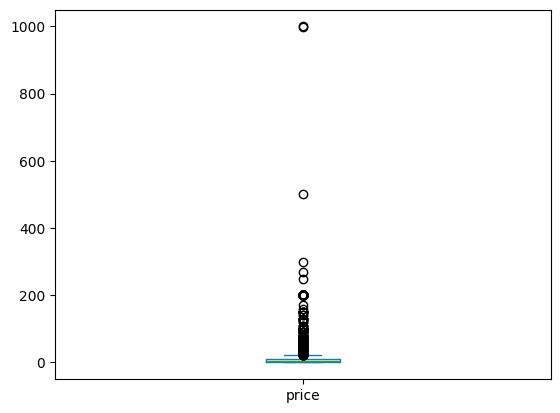

dlc_count


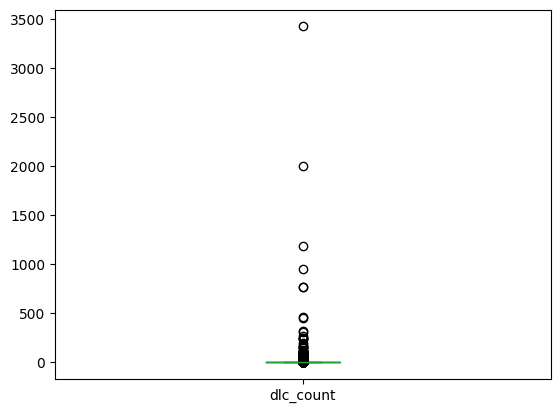

peak_ccu


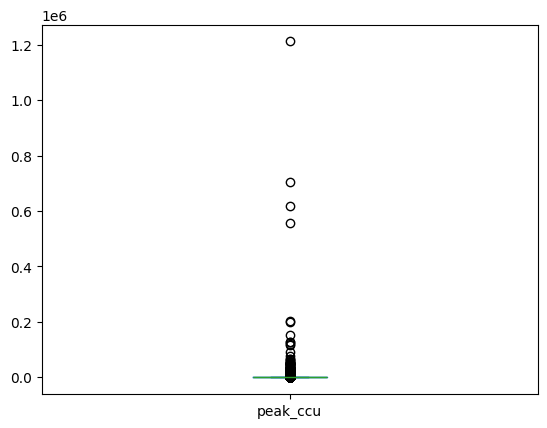

min_estimated_owners


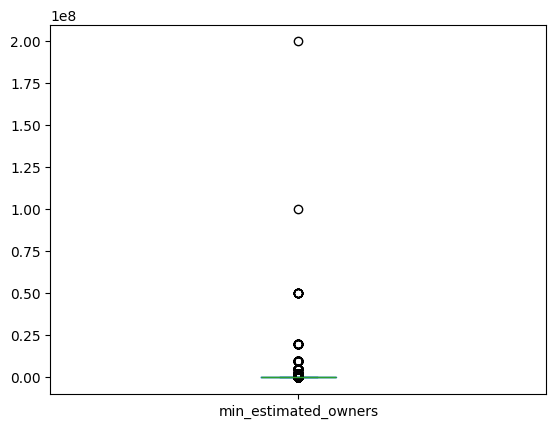

max_estimated_owners


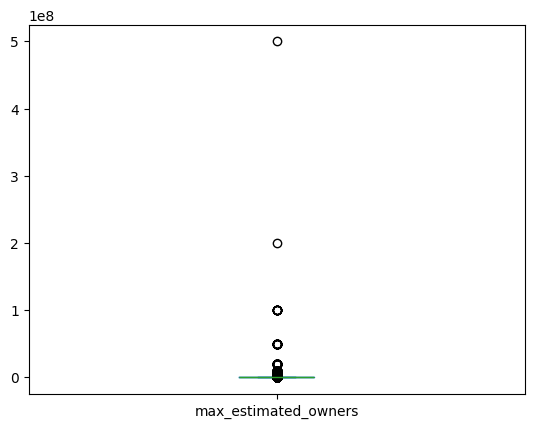

average_playtime_forever


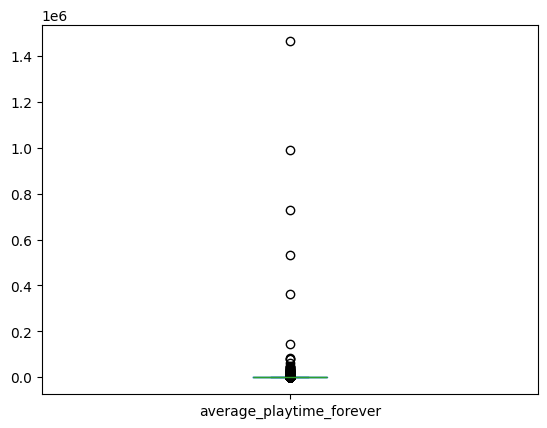

recommendations


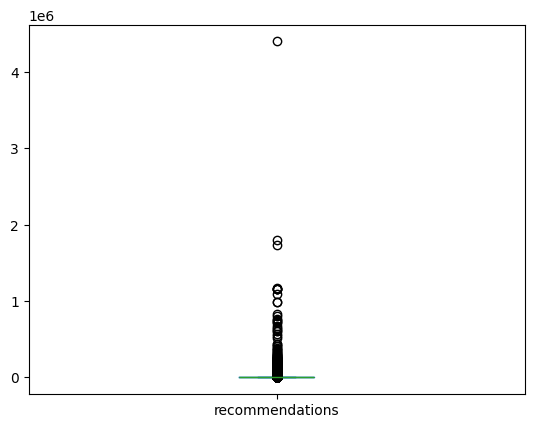

positive


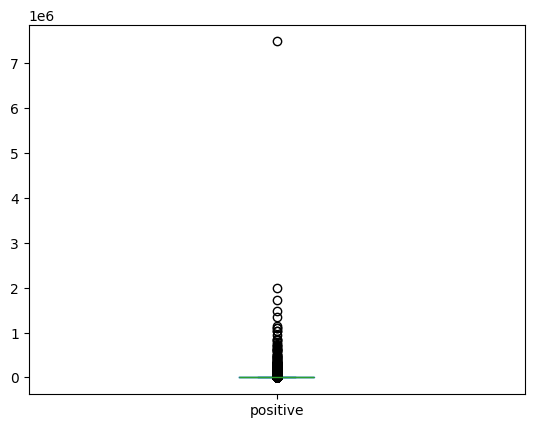

negative


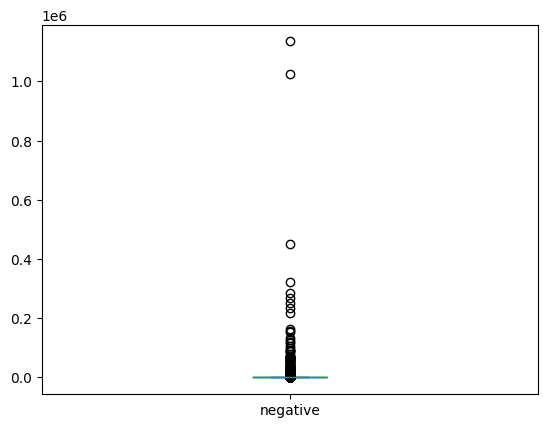

In [283]:
for column in outliers_columns:
  print(column)
  norm_dataset[column].plot(kind="box")
  plt.show()

In [284]:
def Obener_Outliers_IQR(df:pd.DataFrame, column:str) -> pd.Series:
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1

  outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]

  return outliers[column]

In [285]:
def Obtener_Outliers_Standar(df:pd.DataFrame, column:str, sigma:int=3) -> pd.Series:
  mean = df[column].mean()
  std_dev = df[column].std()

  if std_dev == 0:
    return pd.Series()

  z_scores = (df[column] - mean) / std_dev
  outliers = df[(z_scores.abs() > sigma)]

  return outliers[column]

In [286]:
for column in outliers_columns:
  print("-"*50)
  print("Nombre:", column)

  print("Según IQR:")
  outliers = Obener_Outliers_IQR(norm_dataset, column)

  print("Tamaño:", len(outliers))
  print("Outliers:\n", outliers)

  print("Según Normal Estandar:")
  outliers = Obtener_Outliers_Standar(norm_dataset, column, 2)

  print("Tamaño:", len(outliers))
  print("Outliers:\n", outliers)

--------------------------------------------------
Nombre: price
Según IQR:
Tamaño: 3812
Outliers:
 11        39.99
14        59.99
15        39.99
16        59.99
18        59.99
          ...  
72376    199.99
72396     99.99
72499     59.99
72520     24.99
72546     29.99
Name: price, Length: 3812, dtype: float64
Según Normal Estandar:
Tamaño: 1502
Outliers:
 11        39.99
14        59.99
15        39.99
16        59.99
18        59.99
          ...  
72092     39.99
72093     69.99
72376    199.99
72396     99.99
72499     59.99
Name: price, Length: 1502, dtype: float64
--------------------------------------------------
Nombre: dlc_count
Según IQR:
Tamaño: 12269
Outliers:
 0        1
2        2
4        9
5        9
6        9
        ..
72323    5
72363    1
72364    3
72394    3
72539    1
Name: dlc_count, Length: 12269, dtype: int64
Según Normal Estandar:
Tamaño: 136
Outliers:
 21        98
33        78
37        41
42        48
43        41
        ... 
67231    100
67309    

##Guardado

In [287]:
norm_dataset.fillna(".", inplace=True)

In [288]:
print(norm_dataset.columns, len(norm_dataset.columns))

Index(['index', 'required_age', 'price', 'dlc_count', 'reviews',
       'metacritic_score', 'achievements', 'recommendations', 'publishers',
       'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'full_description', 'all_tags',
       'min_estimated_owners', 'max_estimated_owners',
       'porcentaje_positive_total', 'porcentaje_negative_total',
       'total_num_reviews'],
      dtype='object') 27


In [289]:
norm_dataset.head(3)

,index,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,...,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners,porcentaje_positive_total,porcentaje_negative_total,total_num_reviews
0,0,E,0.0,1,.,0,1,4401572,['Valve'],7480813,...,2012,8,21,"For over two decades, Counter-Strike has offer...","['Multiplayer', 'Action', 'Free To Play', 'Rem...",100000000,200000000,0.868255,0.131745,8615921
1,1,E,0.0,0,.,0,37,1732007,"['KRAFTON, Inc.']",1487960,...,2017,12,21,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['Multiplayer', 'Action', 'Free To Play', 'Rem...",50000000,100000000,0.592247,0.407753,2512396
2,2,E,0.0,2,A modern multiplayer masterpiece Once you star...,90,0,14337,['Valve'],1998462,...,2013,7,9,"The most-played game on Steam. Every day, mill...","['Multiplayer', 'Action', 'Free To Play', 'RPG...",200000000,500000000,0.815765,0.184235,2449800


In [290]:
norm_dataset.tail()

,index,required_age,price,dlc_count,reviews,metacritic_score,achievements,recommendations,publishers,positive,...,release_year,release_month,release_day,full_description,all_tags,min_estimated_owners,max_estimated_owners,porcentaje_positive_total,porcentaje_negative_total,total_num_reviews
72543,89494,E,3.99,0,.,0,6,0,['TheBean'],2,...,2024,2,29,The name of the game is literally the game. Ou...,"['Cartoony', 'Single-player', 'Procedural Gene...",0,20000,1.000000,0.000000,2
72544,89495,E,10.00,0,.,0,0,0,['Orion Asistan Hizmetleri A.S.'],2,...,2020,1,7,Briefly: Lands of Pharaoh is a third person vi...,"['Indie', 'Action', 'Single-player', 'Family S...",0,20000,1.000000,0.000000,2
72545,89496,E,1.99,0,.,0,0,0,['Prime2Gold'],2,...,2019,10,10,Player One is a new 3D game where you take con...,"['Early Access', 'Indie', 'Single-player', 'Fa...",0,20000,0.666667,0.333333,3
72546,89497,E,29.99,0,.,0,34,0,['XuJie'],2,...,2025,1,25,"This is an open world game on 3D, also a m...","['Multiplayer', 'Single-player', 'RPG', 'Famil...",0,20000,1.000000,0.000000,2
72547,89498,E,9.99,0,.,0,12,0,['Prime Time Studio'],8,...,2018,3,1,Ragtag Adventurers is a Boss Rush game that pi...,"['Indie', 'Online Co-op', 'Action', 'Single-pl...",0,20000,0.666667,0.333333,12


In [291]:
norm_dataset.to_csv("/content/drive/MyDrive/AyVD Proyecto/normalized_dataset.csv", index=False)

#Prepocesamiento NLP

#EDA

In [292]:
numerical_columns = norm_dataset.select_dtypes(include=[np.number]).columns
categorical_columns = norm_dataset.select_dtypes(exclude=[np.number]).columns

In [293]:
print(numerical_columns, len(numerical_columns))
print(categorical_columns, len(categorical_columns))

Index(['index', 'price', 'dlc_count', 'metacritic_score', 'achievements',
       'recommendations', 'positive', 'negative', 'average_playtime_forever',
       'average_playtime_2weeks', 'median_playtime_forever',
       'median_playtime_2weeks', 'discount', 'peak_ccu', 'release_year',
       'release_month', 'release_day', 'min_estimated_owners',
       'max_estimated_owners', 'porcentaje_positive_total',
       'porcentaje_negative_total', 'total_num_reviews'],
      dtype='object') 22
Index(['required_age', 'reviews', 'publishers', 'full_description',
       'all_tags'],
      dtype='object') 5


In [294]:
dataset_special = norm_dataset[numerical_columns]

In [295]:
num_cols_total = len(dataset_special.columns)
num_cols_total

22

In [296]:
scaler = skl.preprocessing.StandardScaler()
dataset_special[numerical_columns] = scaler.fit_transform(dataset_special[numerical_columns])

/tmp/ipython-input-1939158065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_special[numerical_columns] = scaler.fit_transform(dataset_special[numerical_columns])


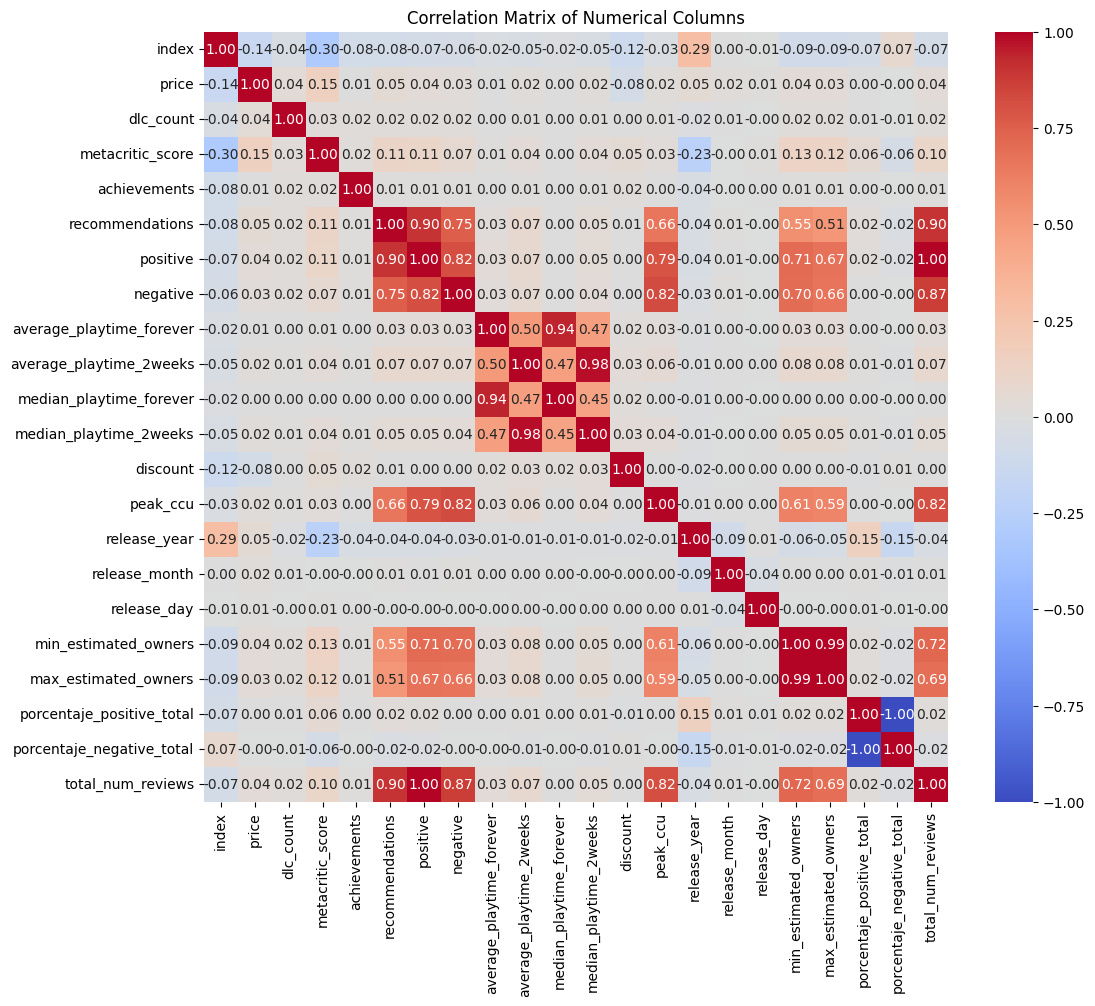

In [297]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(dataset_special.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

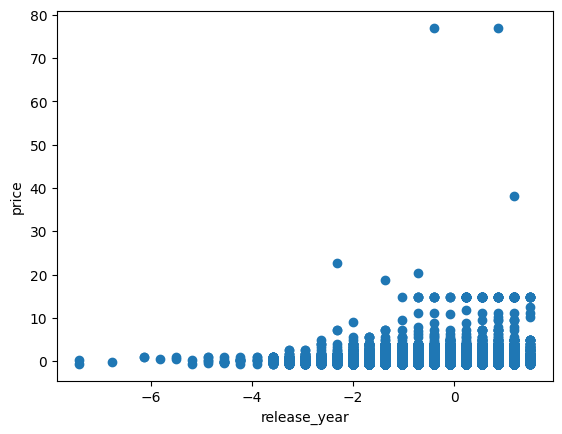

In [298]:
plt.scatter(dataset_special["release_year"], dataset_special["price"])
plt.xlabel("release_year")
plt.ylabel("price")
plt.show()

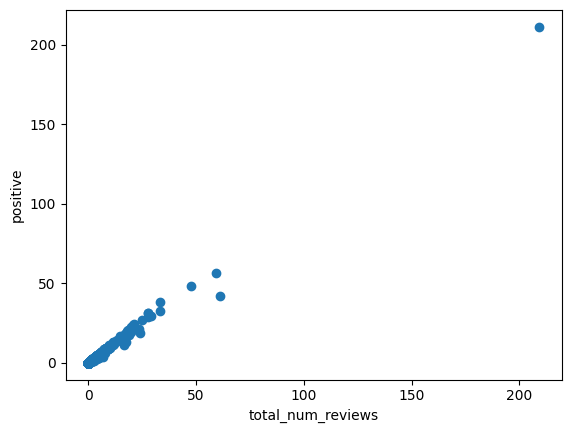

In [299]:
plt.scatter(dataset_special["total_num_reviews"], dataset_special["positive"])
plt.xlabel("total_num_reviews")
plt.ylabel("positive")
plt.show()

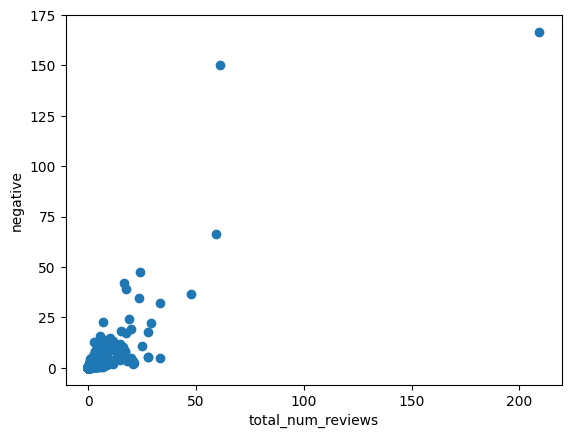

In [300]:
plt.scatter(dataset_special["total_num_reviews"], dataset_special["negative"])
plt.xlabel("total_num_reviews")
plt.ylabel("negative")
plt.show()

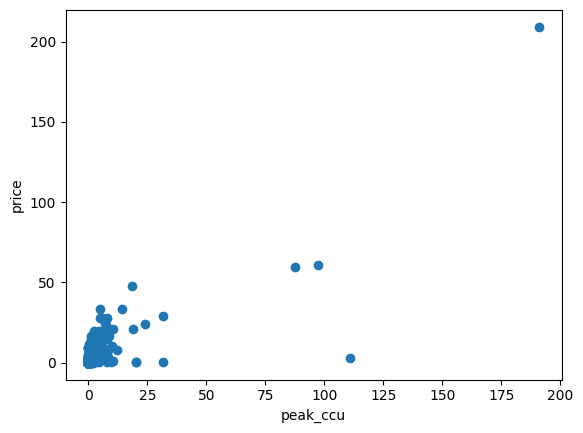

In [311]:
plt.scatter(dataset_special["peak_ccu"], dataset_special["total_num_reviews"])
plt.xlabel("peak_ccu")
plt.ylabel("price")
plt.show()

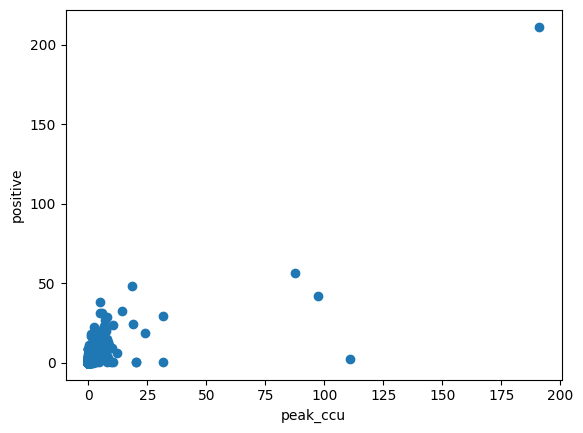

In [312]:
plt.scatter(dataset_special["peak_ccu"], dataset_special["positive"])
plt.xlabel("peak_ccu")
plt.ylabel("positive")
plt.show()

#Gráficas de "Required Age"

/tmp/ipython-input-3166723617.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Count of Games by Required Age')

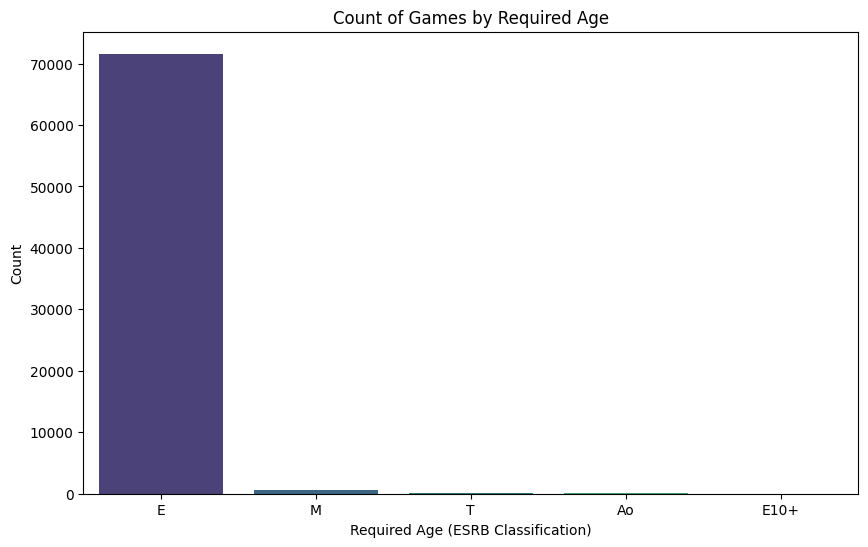

In [327]:
plt.figure(figsize=(10, 6))
sns.countplot(x="required_age", data=norm_dataset, palette="viridis")
plt.xlabel("Required Age (ESRB Classification)")
plt.ylabel("Count")
plt.title("Count of Games by Required Age")

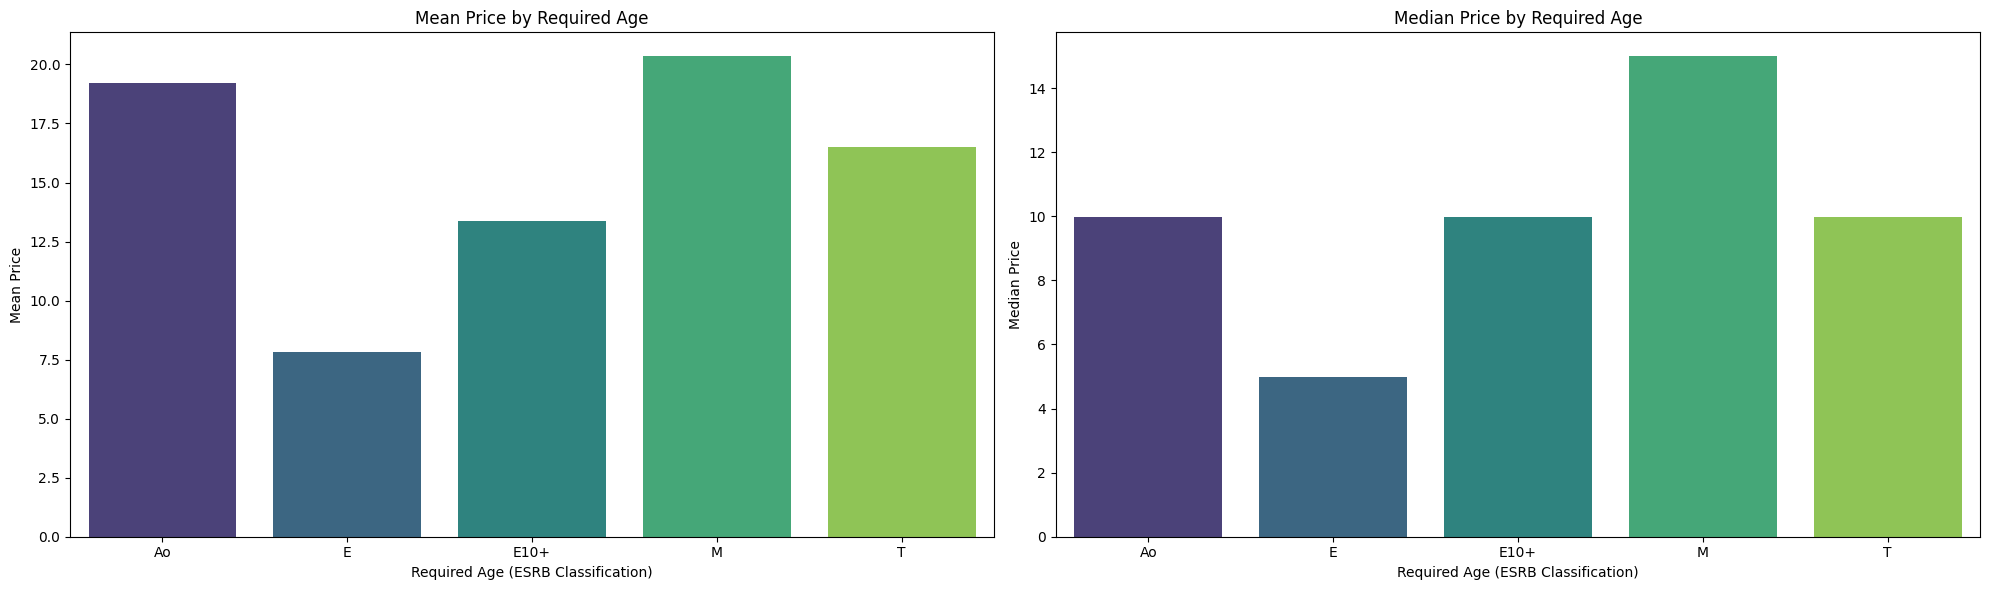

In [335]:
avg_price_by_age = norm_dataset.groupby("required_age")["price"].mean().reset_index()
med_price_by_age = norm_dataset.groupby("required_age")["price"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="price", data=avg_price_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Price")
axes[0].set_title("Mean Price by Required Age")

sns.barplot(x="required_age", y="price", data=med_price_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Price")
axes[1].set_title("Median Price by Required Age")

plt.tight_layout()
plt.show()

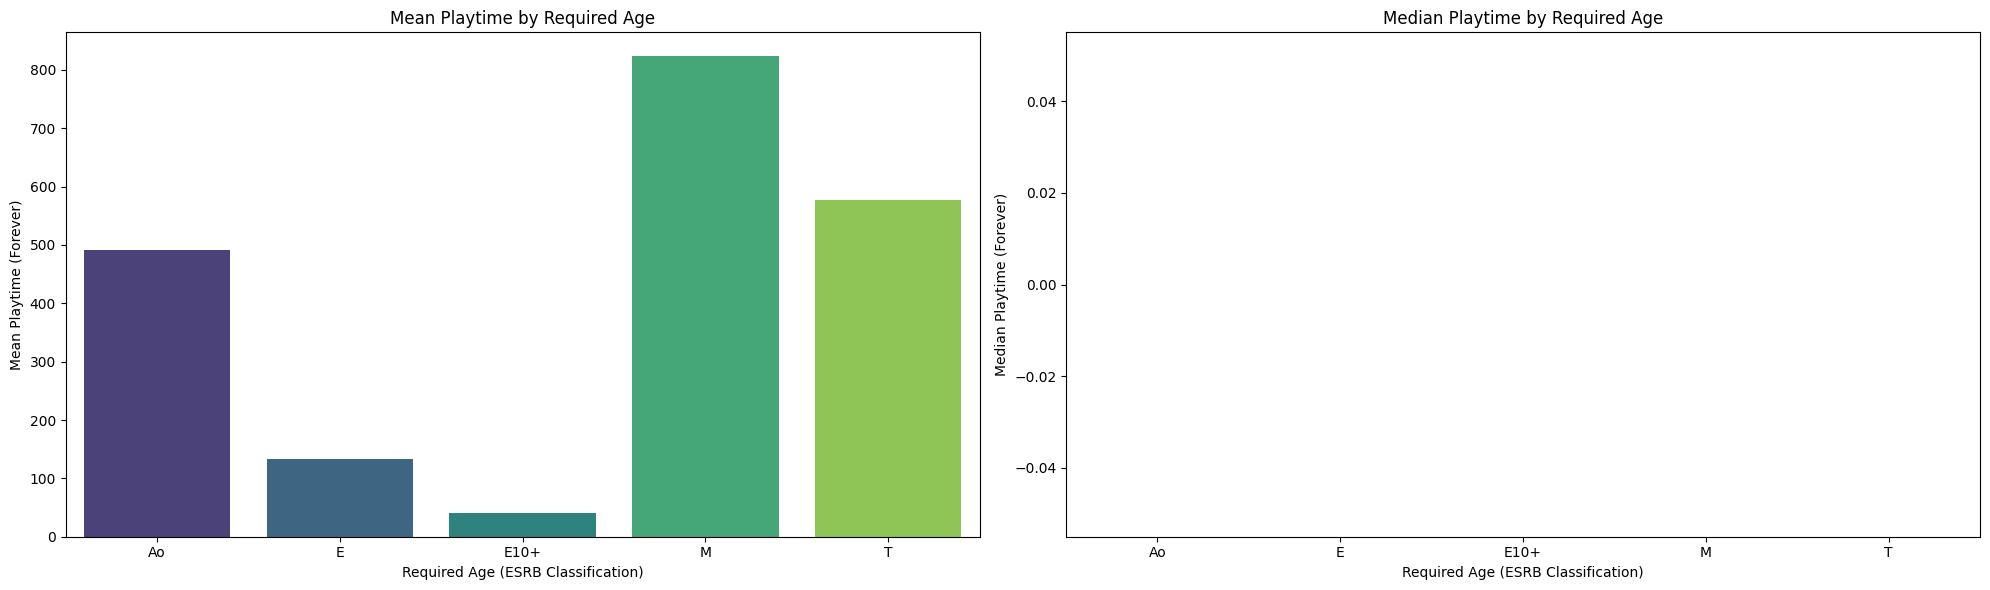

In [349]:
avg_playtime_forever_by_age = norm_dataset.groupby("required_age")["average_playtime_forever"].mean().reset_index()
med_playtime_forever_by_age = norm_dataset.groupby("required_age")["average_playtime_forever"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="average_playtime_forever", data=avg_playtime_forever_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Playtime (Forever)")
axes[0].set_title("Mean Playtime by Required Age")

sns.barplot(x="required_age", y="average_playtime_forever", data=med_playtime_forever_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Playtime (Forever)")
axes[1].set_title("Median Playtime by Required Age")

plt.tight_layout()
plt.show()

In [346]:
display(med_playtime_forever_by_age)

,required_age,average_playtime_forever
0,Ao,0.0
1,E,0.0
2,E10+,0.0
3,M,0.0
4,T,0.0


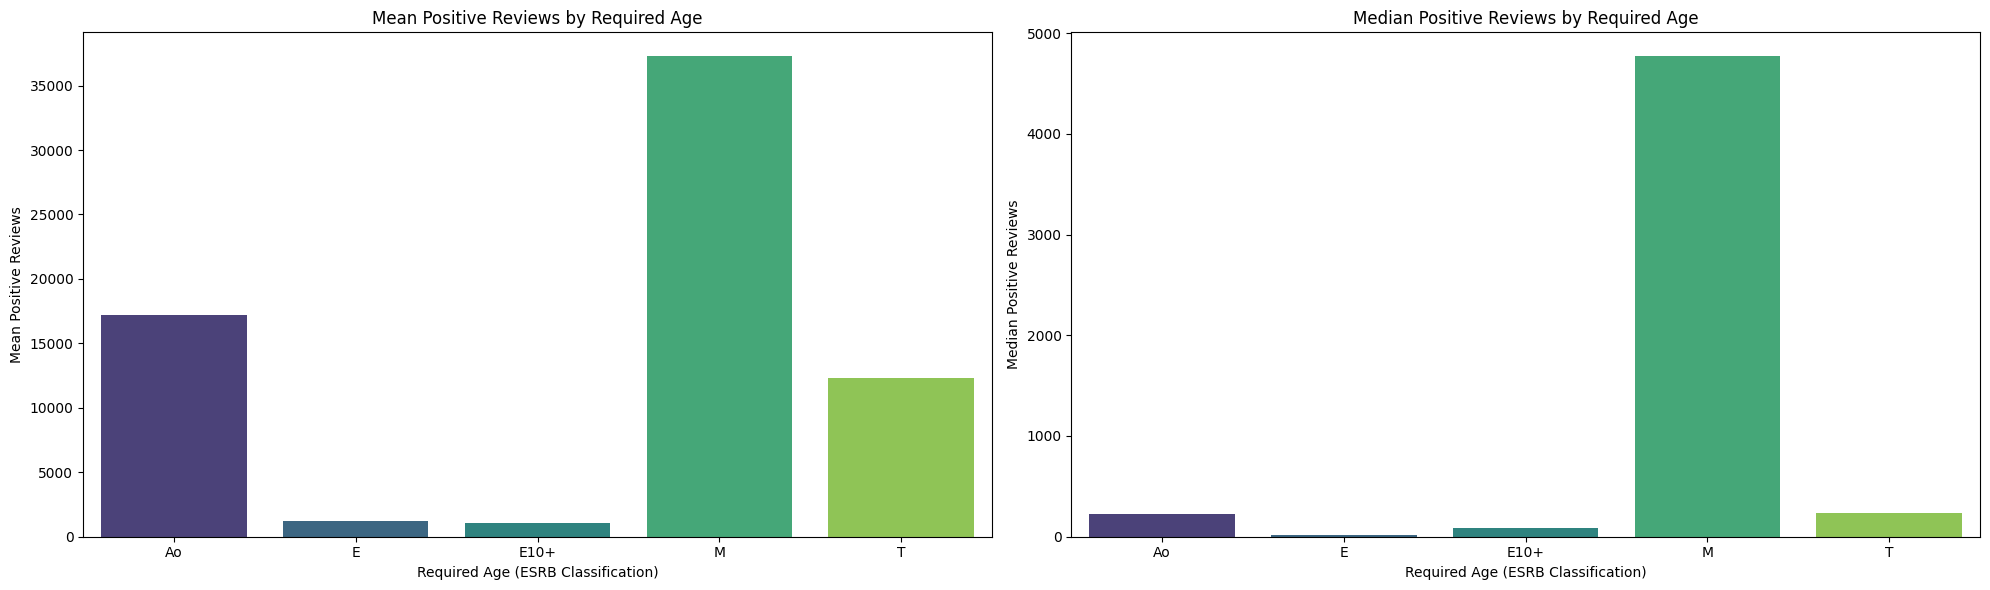

In [343]:
avg_positive_by_age = norm_dataset.groupby("required_age")["positive"].mean().reset_index()
med_positive_by_age = norm_dataset.groupby("required_age")["positive"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="positive", data=avg_positive_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Positive Reviews")
axes[0].set_title("Mean Positive Reviews by Required Age")

sns.barplot(x="required_age", y="positive", data=med_positive_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Positive Reviews")
axes[1].set_title("Median Positive Reviews by Required Age")

plt.tight_layout()
plt.show()

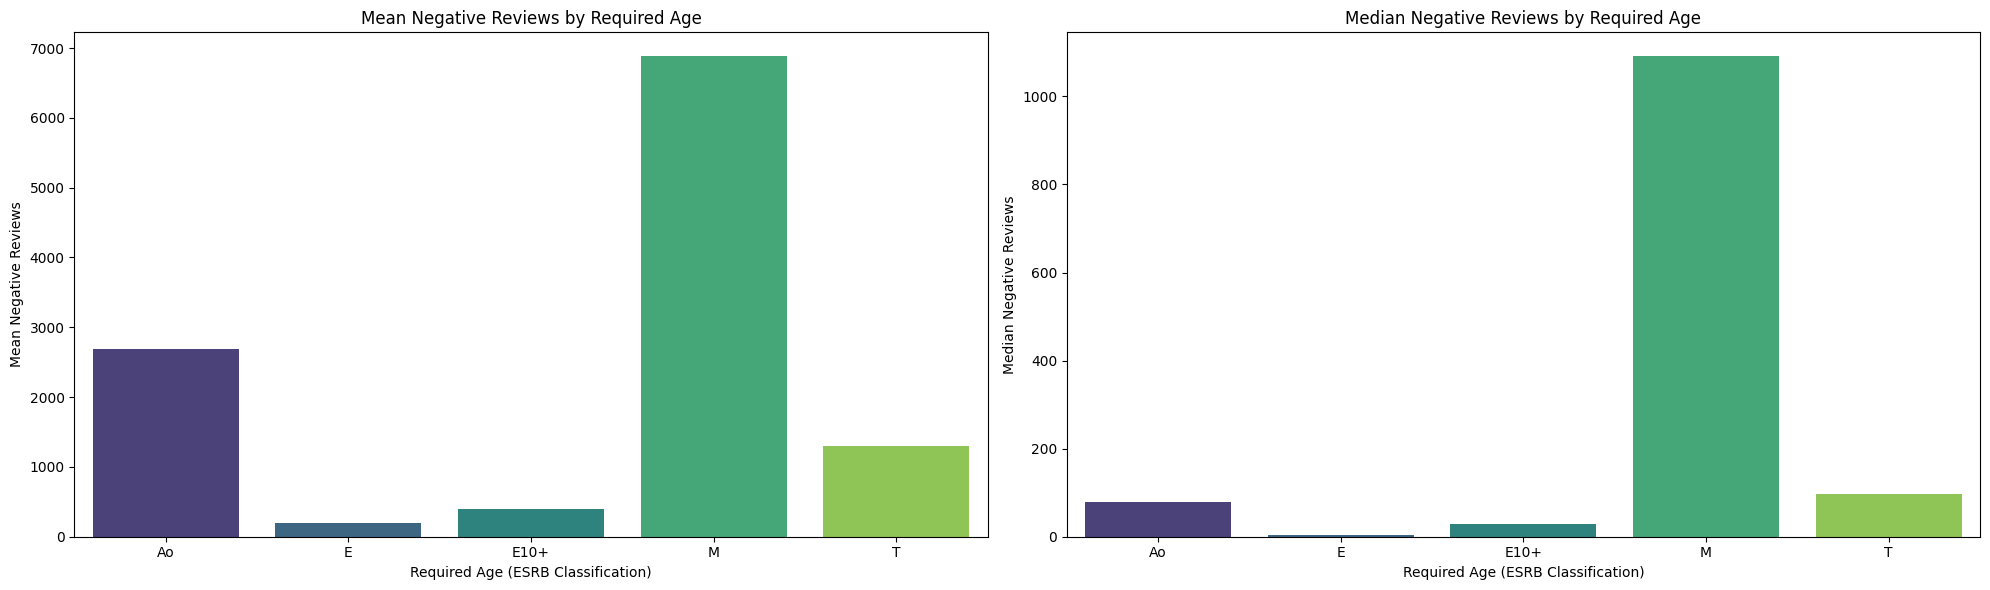

In [344]:
avg_negative_by_age = norm_dataset.groupby("required_age")["negative"].mean().reset_index()
med_negative_by_age = norm_dataset.groupby("required_age")["negative"].median().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x="required_age", y="negative", data=avg_negative_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[0])
axes[0].set_xlabel("Required Age (ESRB Classification)")
axes[0].set_ylabel("Mean Negative Reviews")
axes[0].set_title("Mean Negative Reviews by Required Age")

sns.barplot(x="required_age", y="negative", data=med_negative_by_age, palette="viridis", hue="required_age", legend=False, ax=axes[1])
axes[1].set_xlabel("Required Age (ESRB Classification)")
axes[1].set_ylabel("Median Negative Reviews")
axes[1].set_title("Median Negative Reviews by Required Age")

plt.tight_layout()
plt.show()

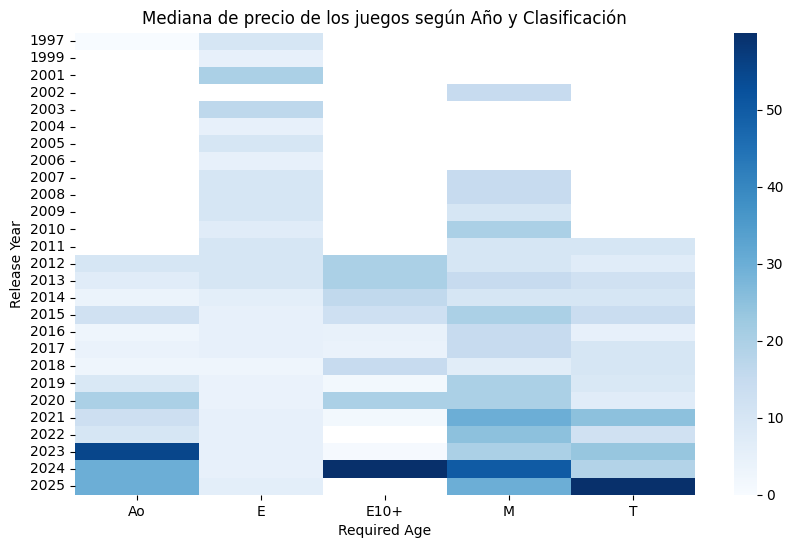

In [345]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['price'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Mediana de precio de los juegos según Año y Clasificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()


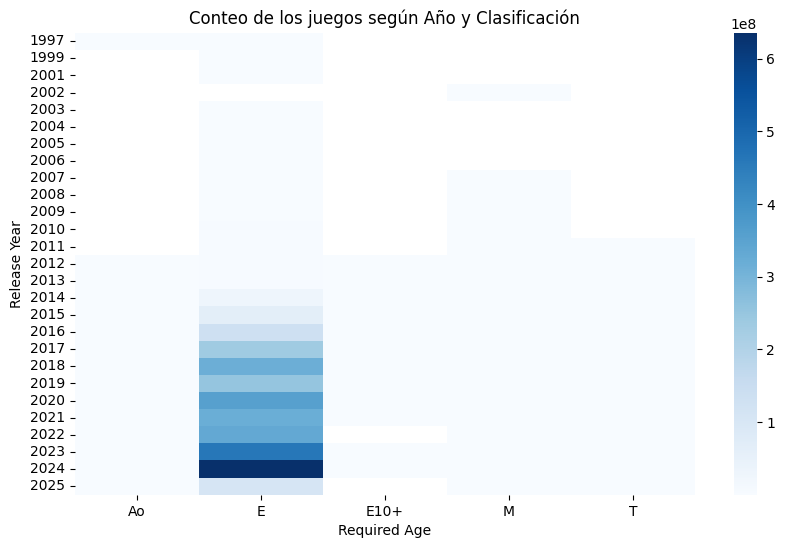

In [357]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['index'].sum().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Conteo de los juegos según Año y Clasificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

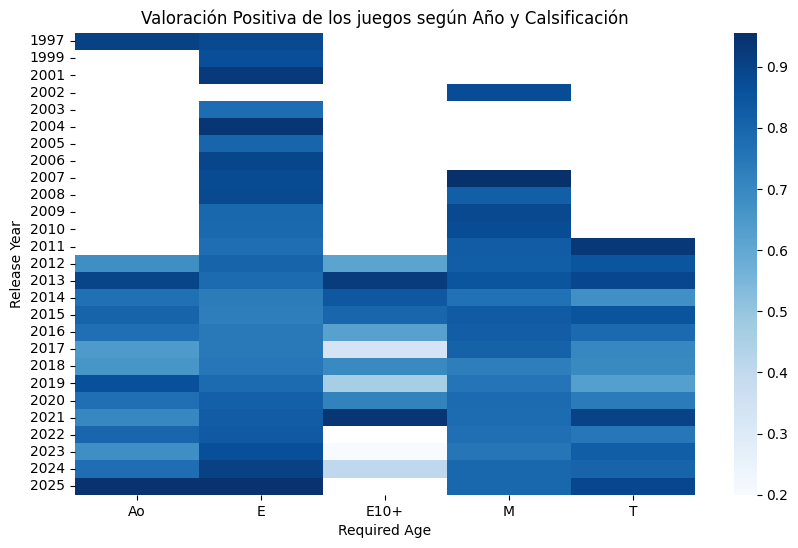

In [362]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['porcentaje_positive_total'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Valoración Positiva de los juegos según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

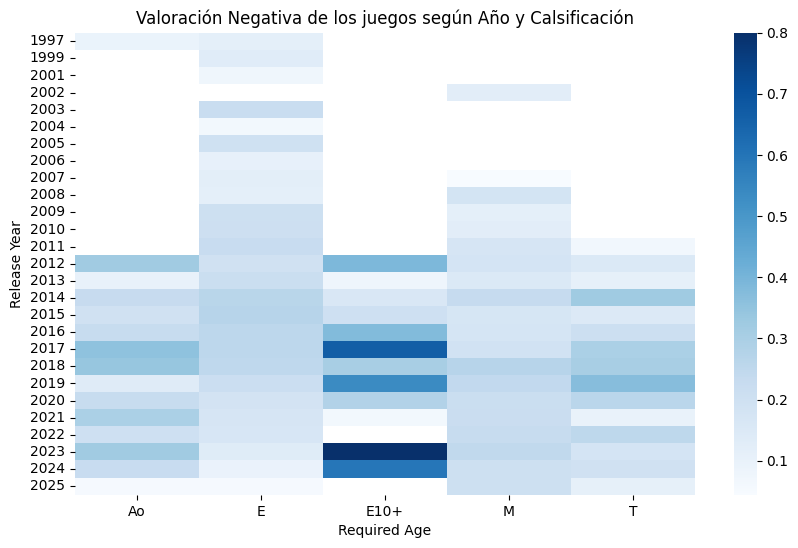

In [364]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['porcentaje_negative_total'].median().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Valoración Negativa de los juegos según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

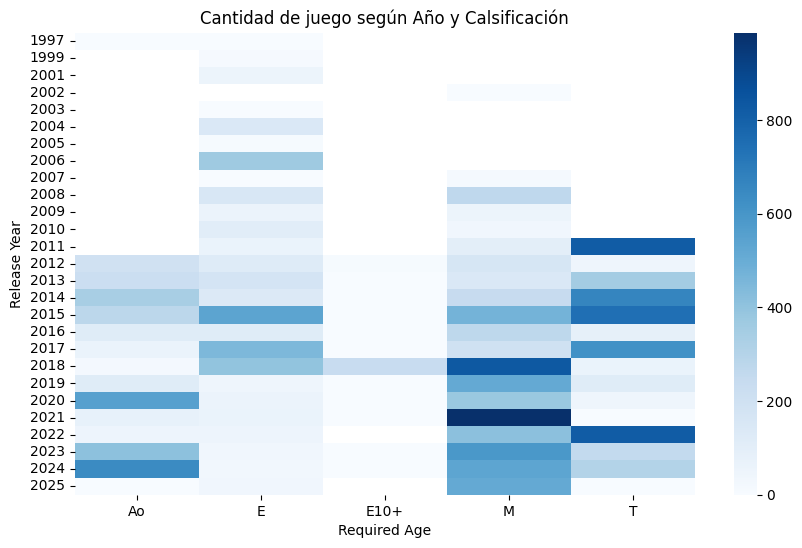

In [370]:
tabla = (norm_dataset.groupby(['release_year', 'required_age'])['median_playtime_forever'].mean().unstack())

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, cmap="Blues")
plt.title("Tiempo de Juego según Año y Calsificación")
plt.xlabel("Required Age")
plt.ylabel("Release Year")
plt.show()

#ToDo:

* Análizis de NLP, de "Categories", "Tags", "Reviews" para generar word clouds de la relación palabras con porcentaje de positivos del juego
* Expectativas del Precio